**Import libraries**

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download()
nltk.download('punkt')
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,precision_score

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [ ] chat80.....

Data is obtained from UCI Machine learning repository:
https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Druglib.com%29

In [242]:
train=pd.read_csv('/content/drive/MyDrive/drugLibTrain_raw.tsv',sep='\t')
test=pd.read_csv('/content/drive/MyDrive/drugLibTest_raw.tsv',sep='\t')
train.head(2)

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."


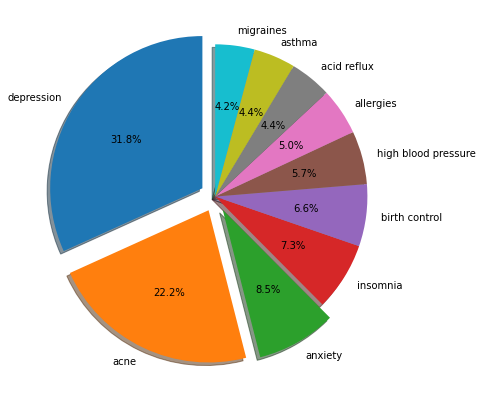

In [243]:
# Top 10 conditions/diseases in train data
val=train.condition.value_counts()[:10]
fig = plt.figure(figsize =(10, 7))
explode=(0.1,0.1,0.1,0,0,0,0,0,0,0)
plt.pie(val,labels=val.keys(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

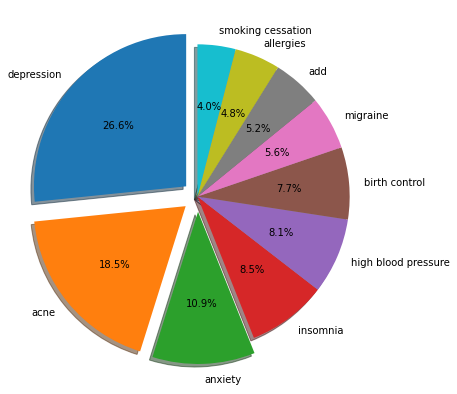

In [244]:
# Top 10 conditions/diseases in test data
val=test.condition.value_counts()[:10]
fig = plt.figure(figsize =(10, 7))
explode=(0.1,0.1,0.1,0,0,0,0,0,0,0)
plt.pie(val,labels=val.keys(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [245]:
# Convert rating to sentiment of positive or negative 
def rate(df):
  if df<=5:
    return 'negative'
  else:
    return 'positive'

Based on rating, finding out which drug is most effective (top three conditions - depression, acne and anxiety are choosen)

In [246]:
# Subsetting the condition,'depression' from train and test data
dep_train=train[train.condition=='depression']
dep_test=test[test.condition=='depression']
len(dep_train),len(dep_test)

(236, 66)

In [247]:
dep_train.rating=dep_train.rating.apply(rate)
dep_test.rating=dep_test.rating.apply(rate)
val_train=dep_train.rating.value_counts()
val_test=dep_test.rating.value_counts()
print(val_train,val_test)

positive    177
negative     59
Name: rating, dtype: int64 positive    52
negative    14
Name: rating, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


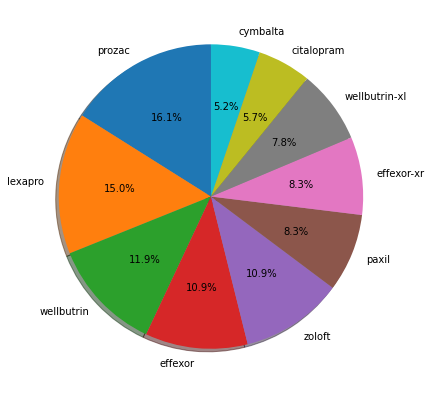

In [248]:
# Top 10 drugs used to treat depression in train data
val=dep_train.urlDrugName.value_counts()[:10]
fig = plt.figure(figsize =(15,7))
plt.pie(val,labels=val.keys(),autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

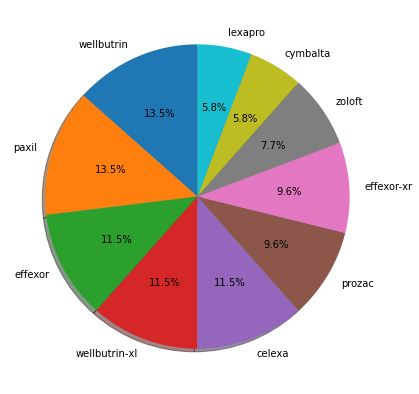

In [249]:
# Top 10 drugs used to treat depression in test data
val=dep_test.urlDrugName.value_counts()[:10]
fig = plt.figure(figsize =(15,7))
plt.pie(val,labels=val.keys(),autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

[27, 21, 18, 15, 16] [4, 8, 5, 6, 5]


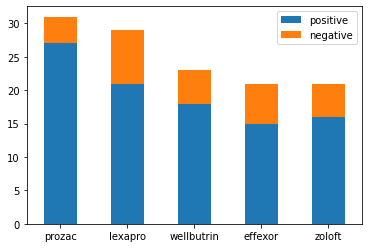

In [250]:
# Considering drugs with atleast 10% response
drugs=['prozac','lexapro','wellbutrin','effexor','zoloft']
positive=[]
negative=[]

for i in drugs:
  #print(i)
  a=dep_train[dep_train.urlDrugName==i]
  a_pos=len(a[a.rating=='positive'])
  #print(a_pos)
  positive.append(a_pos)
  a_neg=len(a[a.rating=='negative'])
  negative.append(a_neg) 
print(positive,negative)

df = pd.DataFrame({'positive': positive,
                   'negative': negative}, index=drugs)
df.plot.bar(stacked=True,rot=0)

In [251]:
# Subsetting condition 'acne' from train and test data
acne_train=train[train.condition=='acne']
acne_test=test[test.condition=='acne']

In [252]:
acne_train.rating=acne_train.rating.apply(rate)
acne_test.rating=acne_test.rating.apply(rate)
val_train=acne_train.rating.value_counts()
val_test=acne_test.rating.value_counts()
print(val_train,val_test)

positive    127
negative     38
Name: rating, dtype: int64 positive    36
negative    10
Name: rating, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


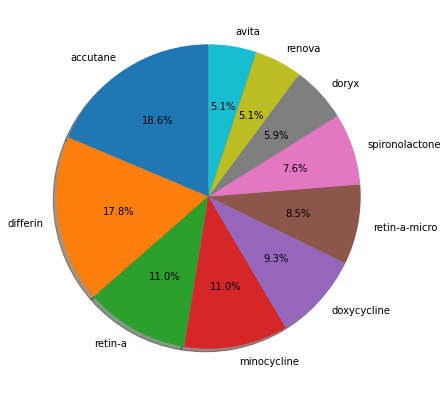

In [253]:
# Top 10 drugs used to treat acne in train data
val=acne_train.urlDrugName.value_counts()[:10]
fig = plt.figure(figsize =(15,7))
plt.pie(val,labels=val.keys(),autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

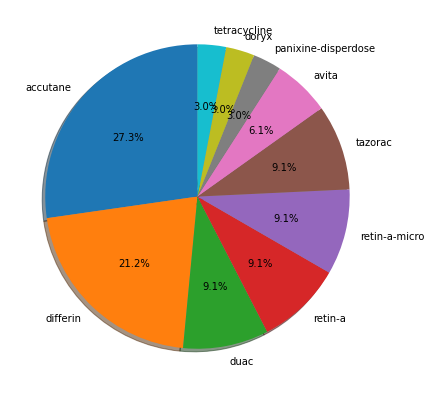

In [254]:
# Top 10 drugs used to treat acne in test data
val=acne_test.urlDrugName.value_counts()[:10]
fig = plt.figure(figsize =(15,7))
plt.pie(val,labels=val.keys(),autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

[20, 17, 6, 10] [2, 4, 7, 3]


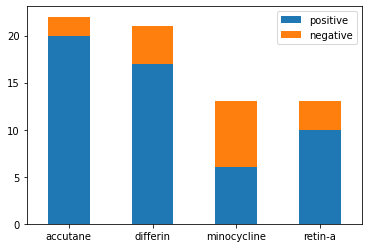

In [255]:
# Considering drugs with atleast 10% response
drugs=['accutane','differin','minocycline','retin-a']
positive=[]
negative=[]

for i in drugs:
  #print(i)
  a=acne_train[acne_train.urlDrugName==i]
  a_pos=len(a[a.rating=='positive'])
  #print(a_pos)
  positive.append(a_pos)
  a_neg=len(a[a.rating=='negative'])
  negative.append(a_neg) 

print(positive,negative)
df = pd.DataFrame({'positive': positive,
                   'negative': negative}, index=drugs)
ax = df.plot.bar(stacked=True,rot=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


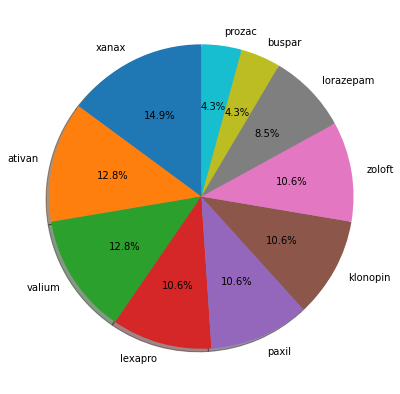

In [256]:
# Subsetting condition 'anxiety' from train and test data
anx_train=train[train.condition=='anxiety']
anx_test=test[test.condition=='anxiety']
anx_train.rating=anx_train.rating.apply(rate)
anx_test.rating=anx_test.rating.apply(rate)

# Top 10 drugs used to treat anxiety in train data
val=anx_train.urlDrugName.value_counts()[:10]
fig = plt.figure(figsize =(15,7))
plt.pie(val,labels=val.keys(),autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

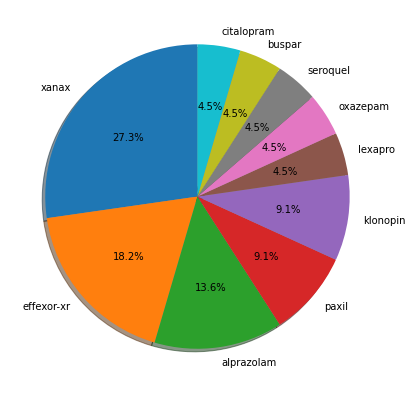

In [257]:
# Top 10 drugs to treat anxiety in test data
val=anx_test.urlDrugName.value_counts()[:10]
fig = plt.figure(figsize =(15,7))
plt.pie(val,labels=val.keys(),autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

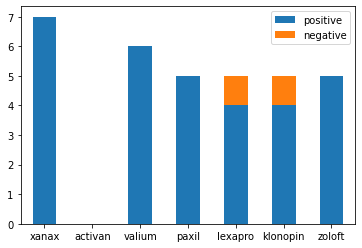

In [258]:
# Drugs with minimum 10% response
drugs=['xanax','activan','valium','paxil','lexapro','klonopin','zoloft']
positive=[]
negative=[]

for i in drugs:
  #print(i)
  a=anx_train[anx_train.urlDrugName==i]
  a_pos=len(a[a.rating=='positive'])
  #print(a_pos)
  positive.append(a_pos)
  a_neg=len(a[a.rating=='negative'])
  negative.append(a_neg) 

df = pd.DataFrame({'positive': positive,
                   'negative': negative}, index=drugs)
ax = df.plot.bar(stacked=True,rot=0)

Based on the above data, the top drug to treat depression is 'Prozac', for acne it is 'Accutane' and for anxiety it is 'Xanax'.

**Building machine learning models for sentiment analysis with the top three conditions**

In [259]:
final_train=train[(train['condition']=='depression') | (train['condition']=='acne') | (train['condition']=='anxiety')]
final_test=test[(test.condition=='depression') | (test.condition=='acne') | (test.condition=='anxiety')]

In [260]:
final_train.condition.value_counts()

depression    236
acne          165
anxiety        63
Name: condition, dtype: int64

In [261]:
final_test.condition.value_counts()

depression    66
acne          46
anxiety       27
Name: condition, dtype: int64

In [262]:
final_train.rating=final_train.rating.apply(rate)
final_test.rating=final_test.rating.apply(rate)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [263]:
# Removing the unnecessary columns
final_train.drop(['Unnamed: 0','benefitsReview', 'sideEffectsReview', 'commentsReview'],axis=1,inplace=True)
final_test.drop(['Unnamed: 0','benefitsReview', 'sideEffectsReview', 'commentsReview'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [264]:
x_train,y_train=final_train.drop(['rating'],axis=1),final_train['rating']
x_test,y_test=final_test.drop(['rating'],axis=1),final_test['rating']

In [265]:
x_train.head(1)

,urlDrugName,effectiveness,sideEffects,condition
7,elavil,Considerably Effective,No Side Effects,depression


In [266]:
# Merging the string columns of train data
x_train.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
for i in x_train.columns:
    x_train[i]=x_train[i].str.lower()

lines_train = []
for row in range(0,len(x_train)):
    lines_train.append(' '.join(str(i) for i in x_train.iloc[row,1:3]))

In [267]:
lines_train[:7]

['considerably effective no side effects',
 'considerably effective mild side effects',
 'highly effective no side effects',
 'highly effective moderate side effects',
 'considerably effective mild side effects',
 'highly effective mild side effects',
 'considerably effective no side effects']

In [268]:
x_test.head(1)

,urlDrugName,effectiveness,sideEffects,condition
9,effexor,Marginally Effective,Extremely Severe Side Effects,depression


In [269]:
# Merging string columns of test data
x_test.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
for i in x_test.columns:
    x_test[i]=x_test[i].str.lower()

lines_test = []
for row in range(0,len(x_test)):
    lines_test.append(' '.join(str(i) for i in x_test.iloc[row,1:3]))

In [270]:
lines_test[:7]

['marginally effective extremely severe side effects',
 'moderately effective mild side effects',
 'considerably effective mild side effects',
 'considerably effective mild side effects',
 'considerably effective mild side effects',
 'moderately effective mild side effects',
 'highly effective mild side effects']

In [271]:
# Tokenization and Lemmatization to obtain adjectives 
for i in range(len(lines_test)):
    
    words=re.sub('[^a-zA-Z]',' ',lines_test[i])
    words=nltk.word_tokenize(words)
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    tag=nltk.pos_tag(words)
    words=[word for word,pos in tag if pos=='JJ']
    lines_test[i]=' '.join(words)

for i in range(len(lines_train)):
    
    words=re.sub('[^a-zA-Z]',' ',lines_train[i])
    words=nltk.word_tokenize(words)
    
    words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    tag=nltk.pos_tag(words)
    words=[word for word,pos in tag if pos=='JJ']
    lines_train[i]=' '.join(words)

In [272]:
# Converting features to arrays
cv=CountVectorizer(max_features=500,ngram_range=(2,2))
x_train=cv.fit_transform(lines_train).toarray()
x_test=cv.fit_transform(lines_test).toarray()

# Label encoding the rating variable
lab=LabelEncoder()
y_train=lab.fit_transform(y_train)
y_test=lab.fit_transform(y_test)

list(lab.classes_)
lab.transform(['negative', 'positive'])

array([0, 1])

In [273]:
cv.get_feature_names()

['effective mild',
 'effective moderate',
 'effective severe',
 'ineffective mild',
 'ineffective moderate',
 'ineffective severe']

Training and Predictions with various ML algorithms

In [274]:
rf=RandomForestClassifier(n_estimators=500,criterion='entropy')
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
accuracy_score(y_test,pred_rf),precision_score(y_test,pred_rf)

(0.8776978417266187, 0.9026548672566371)

In [275]:
model=MultinomialNB().fit(x_train,y_train)
pred_nb=model.predict(x_test)
accuracy_score(y_test,pred_nb),precision_score(y_test,pred_nb)

(0.8776978417266187, 0.9026548672566371)

In [276]:
svm = SVC(kernel='linear').fit(x_train,y_train)
pred_svm=svm.predict(x_test)
accuracy_score(y_test,pred_svm),precision_score(y_test,pred_svm)

(0.8776978417266187, 0.9026548672566371)

Implementing Deep learning LSTM model for sentiment analysis of drug review

In [277]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

In [278]:
# Preprocessing train data for LSTM
max_words=5000
max_len=500
emb=100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines_train)
train_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_index))

x_train = tokenizer.texts_to_sequences(headlines_train)
x_train = pad_sequences(x_train, maxlen=max_len)
print('Shape of data tensor:', x_train.shape)

Found 5 unique tokens.
Shape of data tensor: (464, 500)


In [279]:
# Preprocessing test data for LSTM
max_words=5000
max_len=500
emb=100
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines_test)
test_index = tokenizer.word_index
print('Found %s unique tokens.' % len(test_index))

x_test = tokenizer.texts_to_sequences(headlines_test)
x_test = pad_sequences(x_test, maxlen=max_len)
print('Shape of data tensor:', x_test.shape)

Found 5 unique tokens.
Shape of data tensor: (139, 500)


In [280]:
y_train=final_train['rating']
y_test=final_test['rating']
y_train=lab.fit_transform(y_train)
y_test=lab.fit_transform(y_test)

In [281]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(464, 500) (464,)
(139, 500) (139,)


In [282]:
# Training the LSTM Model 
model = Sequential()
model.add(Embedding(max_words,emb,input_length=464))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 10
batch_size = 64
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
8/8 [==============================] - 14s 1s/step - loss: 0.6262 - accuracy: 0.7198
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 0.5379 - accuracy: 0.7608
Epoch 3/10
8/8 [==============================] - 11s 1s/step - loss: 0.5176 - accuracy: 0.7608
Epoch 4/10
8/8 [==============================] - 11s 1s/step - loss: 0.4948 - accuracy: 0.7608
Epoch 5/10
8/8 [==============================] - 11s 1s/step - loss: 0.4666 - accuracy: 0.7608
Epoch 6/10
8/8 [==============================] - 11s 1s/step - loss: 0.4369 - accuracy: 0.8103
Epoch 7/10
8/8 [==============================] - 11s 1s/step - loss: 0.4056 - accuracy: 0.8341
Epoch 8/10
8/8 [==============================] - 11s 1s/step - loss: 0.3856 - accuracy: 0.8448
Epoch 9/10
8/8 [==============================] - 11s 1s/step - loss: 0.3638 - accuracy: 0.8556
Epoch 10/10
8/8 [==============================] - 11s 1s/step - loss: 0.3557 - accuracy: 0.8642


In [283]:
# Predictions
pred=model.predict(x_test)
pred=np.argmax(pred,axis=1)
accuracy_score(y_test,pred),precision_score(y_test,pred)

(0.8705035971223022, 0.9017857142857143)

Prediction on new data

In [284]:
new=['considerably effective no side effects depression']
seq=tokenizer.texts_to_sequences(new)
padded=pad_sequences(seq, maxlen=max_len)
pred=model.predict(padded)
labels=['Negative','Positive']
print(pred, labels[np.argmax(pred)])

[[0.24120519 0.72832316]] Positive


In [285]:
new=['ineffective extremely severe side effects depression']
seq=tokenizer.texts_to_sequences(new)
padded=pad_sequences(seq, maxlen=max_len)
pred=model.predict(padded)
labels=['Negative','Positive']
print(pred, labels[np.argmax(pred)])

[[0.79288065 0.16925567]] Negative
